
# Clasificación Supervisada — Comparación de Modelos

**Objetivos**
- Comprender los fundamentos de la **clasificación supervisada**.
- Conocer y aplicar diferentes modelos de clasificación:
  - Naive Bayes  
  - K-Vecinos más Cercanos (KNN)  
  - Árbol de Decisión  
  - Bosque Aleatorio  
  - Red Neuronal (MLP)
- Comparar el rendimiento de los modelos y reflexionar sobre sus ventajas y limitaciones.



## 1️⃣ Conceptos clave

### Clasificación supervisada
El modelo aprende a **asignar una clase (C)** a un conjunto de características (**X**) a partir de ejemplos conocidos.

Flujo general:
1. Entrenar con datos conocidos → `fit(X_train, y_train)`
2. Predecir con datos nuevos → `predict(X_test)`
3. Evaluar rendimiento → `score()` o `accuracy_score()`

---

### 🔹 Naive Bayes
Se basa en el **teorema de Bayes** y supone independencia entre las variables:
\[
P(C|X) = \frac{P(C)P(X|C)}{P(X)}
\]
Ventajas: rápido, simple y eficiente en datos de texto o con muchas variables.

---

### 🔹 Árbol de Decisión
Crea reglas del tipo **"si-entonces"** para clasificar los datos.  
Ventaja: interpretabilidad.  
Inconveniente: puede sobreajustarse.

---

### 🔹 Bosque Aleatorio
Conjunto de muchos árboles de decisión.  
Reduce el **sobreajuste** y mejora la estabilidad.

---

### 🔹 K-Vecinos más Cercanos (KNN)
Clasifica observando las **k muestras más cercanas**.  
No requiere entrenamiento, pero puede ser lento con grandes volúmenes de datos.

---

### 🔹 Redes Neuronales (MLP)
Modelo con **capas conectadas** (entrada, ocultas, salida).  
Capaz de modelar relaciones **no lineales**.  
Se introduce aquí solo para comparar resultados.

---



## 2️⃣ Práctica guiada: Comparación de clasificadores en el dataset Iris


In [45]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# 1️⃣ Cargar datos
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 2️⃣ Definir modelos
models = {
    "SVM": svm.SVC(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(alpha=1, max_iter=1000)
}

# 3️⃣ Entrenar y evaluar
print("Resultados de precisión en el conjunto de test:")
print("Con load_breast_cancer")
scores = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores[name] = score
    print(f"{name}: {score:.4f}")


Resultados de precisión en el conjunto de test:
Con load_breast_cancer
SVM: 0.9158
Naive Bayes: 0.9368
LDA: 0.9579
QDA: 0.9544
Decision Tree: 0.9263
Random Forest: 0.9439
K-Nearest: 0.9368


c:\Users\U_38010700\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\U_38010700\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Neural Network: 0.9404



### 🔍 Visualización comparativa de resultados


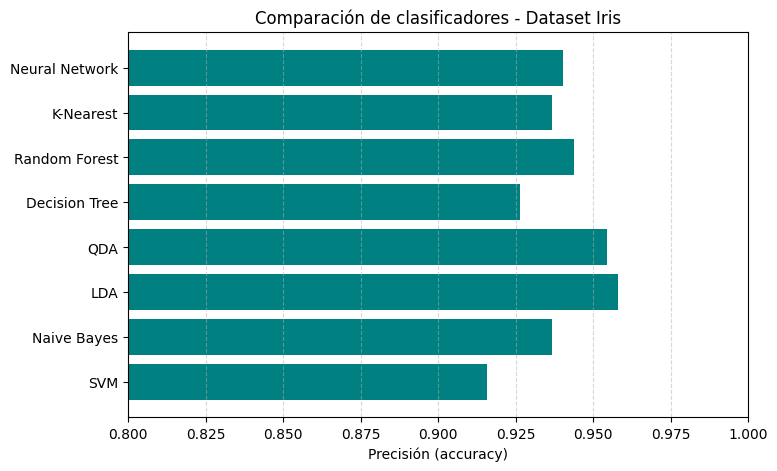

In [46]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(list(scores.keys()), list(scores.values()), color='teal')
plt.xlabel("Precisión (accuracy)")
plt.title("Comparación de clasificadores - Dataset Iris")
plt.xlim(0.8, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()



## 3️⃣ Actividades propuestas

1. Cambia el tamaño del conjunto de test (`test_size`) a 0.2 y 0.4. ¿Varía la precisión?
2. Prueba diferentes parámetros:
   - `n_neighbors` en KNN (3, 5, 10)
   - `max_depth` en Árbol de Decisión (2, 4, None)
   - `n_estimators` en Random Forest (50, 100, 200)
3. Ejecuta el mismo código con otro dataset, como `load_breast_cancer()`.
4. Completa esta tabla en tu cuaderno:

| Modelo | Idea básica | Parámetro clave | Ventaja | Limitación |
|---------|--------------|----------------|----------|-------------|
| Naive Bayes |Usa probabilidades para decidir a qué clase pertenece algo.  |No tiene parámetros importantes.  | Es muy rápido y fácil de usar. |Supone que las variables son independientes  |
| Árbol | Separa los datos con reglas tipo “si… entonces…” | max_depth (qué tan profundo puede ser el árbol). |Se entiende fácilmente y se puede dibujar.  | Si el árbol es muy grande, se puede pasar de memoria |
| Bosque Aleatorio | Combina muchos árboles y hace una votación entre ellos. |n_estimators (cuántos árboles usa).  |Da muy buena precisión y evita errores de un solo árbol.  |Es más lento y no se puede interpretar tan fácil.  |
| KNN |Clasifica mirando los vecinos más cercanos.  | n_neighbors (cuántos vecinos tiene en cuenta). | Es simple y no necesita entrenamiento complicado. |Es lento si hay muchos datos y depende mucho de la escala. |
| Red Neuronal |Imita el cerebro conectando “neuronas” que aprenden patrones | max_iter, alpha (controlan el entrenamiento). | Aprende relaciones muy complejas. |Necesita bastantes datos y tarda más en entrenar. |

5. Reflexiona:
   - ¿Por qué algunos modelos funcionan mejor que otros?
   - ¿Cuál sería más adecuado si necesitas rapidez?
   - ¿Y si necesitas explicabilidad?
